# Diabetes Prediction using Machine Learning

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Objective
We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

## **Details about the dataset:**

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1)

**Number of Observation Units: 768**

**Variable Number: 9**

**Result; The model created as a result of XGBoost hyperparameter optimization became the model with the lowest Cross Validation Score value. (0.90)**

# 1) Exploratory Data Analysis

In [50]:
#Installation of required libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.simplefilter(action = "ignore") 

In [51]:
#Reading the dataset
df = pd.read_csv("../DATA/diabetes.csv")

In [52]:
# The first 5 observation units of the data set were accessed.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
# The size of the data set was examined. It consists of 768 observation units and 9 variables.
df.shape

(768, 9)

In [54]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
# Descriptive statistics of the data set accessed.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
# The distribution of the Outcome variable was examined.
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [57]:
# The classes of the outcome variable were examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

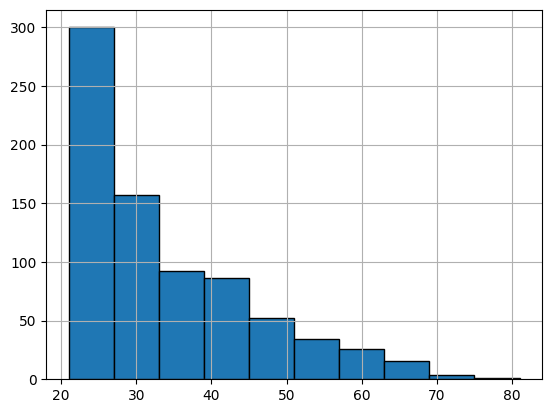

In [58]:
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [59]:
print("Max Age: " + str(df["Age"].max()) + " Min Age: " + str(df["Age"].min()))

Max Age: 81 Min Age: 21


In [60]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [61]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [62]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [63]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [64]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [65]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [66]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [67]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


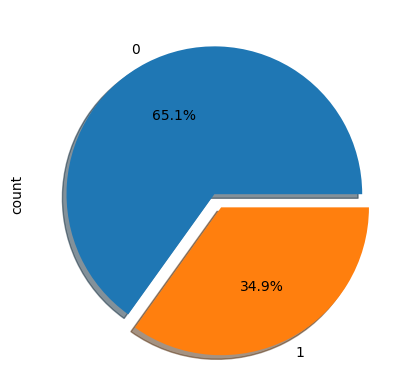

In [68]:
# The distribution of the outcome variable in the data was examined and visualized.

df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)


plt.show()

# 2) Data Preprocessing

## 2.1) Missing Observation Analysis

We saw on df.head() that some features contain 0, it doesn't make sense here and this indicates missing value Below we replace 0 value by NaN:

In [69]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [71]:
# Now, we can look at where are missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [72]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(np.nan,0)

In [73]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Models

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47,1


In [75]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [78]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
X_test[3]

array([-0.25597284, -1.90477929,  0.66616298,  0.51613917, -0.67847404,
        0.33676522, -0.67501731,  1.07637954])

In [80]:
print(y_test.get(3))

0


# Logistic Regression

In [81]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [82]:
y_pred1 = log.predict(X_test)

In [83]:
accuracy_score(y_test,y_pred1)

0.7792207792207793

# Decision Tree Classifier

In [84]:
from sklearn.tree import *
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred2 = dt.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred2)

0.6558441558441559

# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred3 = rf.predict(X_test)

In [89]:
my_pred = rf.predict([[-0.9887,1.232,0.6665,-0.76765,0.12345,0.32343,0.12334,0.87776]])

In [90]:
my_pred

array([1])

In [91]:
accuracy_score(y_test,y_pred3)

0.7987012987012987

In [92]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [93]:
final_data

,Models,ACC
0,LR,77.922078
1,DT,65.584416
2,RF,79.870130


<Axes: xlabel='Models', ylabel='ACC'>

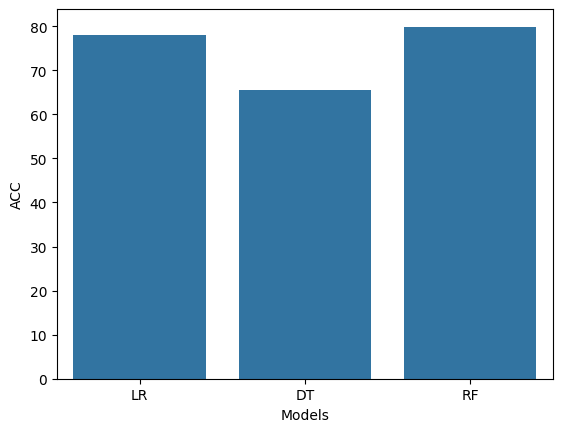

In [94]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'],data=final_data)

# GUI

In [95]:
import pandas as pd


def businesslogic():
    a = int(t1.get())
    b = float(t2.get())
    c = float(t3.get())
    d = float(t4.get())
    e = float(t5.get())
    f = float(t6.get())
    g = float(t7.get())
    h = int(t8.get())

    df2 = pd.DataFrame(columns=['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
    df2.loc[0] = [a,b,c,d,e,f,g,h]
    
    
    
    

    #X = pd.DataFrame({0:a,1:b,2:c,3:d,4:e,5:f,6:g,7:h})
    X_scaled = sc.transform(df2)

    v1 = X_scaled[0][0]
    v2 = X_scaled[0][1]
    v3 = X_scaled[0][2]
    v4 = X_scaled[0][3]
    v5 = X_scaled[0][4]
    v6 = X_scaled[0][5]
    v7 = X_scaled[0][6]
    v8 = X_scaled[0][7]

    xm = [[float(v1),float(v2),float(v3),float(v4),float(v5),float(v6),float(v7),float(v8)]]
    
    print(xm)
 
    
    my_pred2 = rf.predict(xm)
    ans = my_pred2[0]

    if str(my_pred2[0]) is None:
        ans=0

    print(ans)
    if int(ans)==0:
        fnlans="Not Diabetic"
    else:
        fnlans="Patient Is Diabetic"
    

    labelfinal.configure(text=fnlans)
    
    #tkmb.showwarning(title='Diabetes Prediction',message=my_pred2) 
    
    

In [96]:
import os
def businesslogic2():
    os.startfile("diabetes.xlsx")
    

In [97]:
import customtkinter as ctk 
import tkinter.messagebox as tkmb

In [98]:
# Selecting GUI theme - dark, light , system (for system default) 
ctk.set_appearance_mode("dark") 
  
# Selecting color theme - blue, green, dark-blue 
ctk.set_default_color_theme("blue") 
  
app = ctk.CTk() 
app.geometry("400x1000") 
app.title("Diabetes Prediction") 


label = ctk.CTkLabel(app,text="Diabetes Prediction Using Machine Learning") 
  
label.pack(pady=20) 
  
  
frame = ctk.CTkFrame(master=app) 
frame.pack(pady=20,padx=40,fill='both',expand=True) 
  
label = ctk.CTkLabel(master=frame,text='Features') 
label.pack(pady=12,padx=10) 
  

label1 = ctk.CTkLabel(master=frame,text='Pregnancies') 
label1.pack(pady=0,padx=10) 

t1= ctk.CTkEntry(master=frame,placeholder_text="0") 
t1.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Glucose') 
label1.pack(pady=0,padx=10) 

t2= ctk.CTkEntry(master=frame,placeholder_text="0") 
t2.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Blood Pressure') 
label1.pack(pady=0,padx=10) 

t3= ctk.CTkEntry(master=frame,placeholder_text="0") 
t3.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Skin Thickness') 
label1.pack(pady=0,padx=10) 

t4= ctk.CTkEntry(master=frame,placeholder_text="0") 
t4.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Insulin') 
label1.pack(pady=0,padx=10) 
t5= ctk.CTkEntry(master=frame,placeholder_text="0") 
t5.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='BMI') 
label1.pack(pady=0,padx=10)
t6= ctk.CTkEntry(master=frame,placeholder_text="0") 
t6.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Diabetes Pedigree Function') 
label1.pack(pady=0,padx=10)
t7= ctk.CTkEntry(master=frame,placeholder_text="0") 
t7.pack(pady=0,padx=10) 

label1 = ctk.CTkLabel(master=frame,text='Age') 
label1.pack(pady=0,padx=10)
t8= ctk.CTkEntry(master=frame,placeholder_text="0") 
t8.pack(pady=0,padx=10) 


  

  
  
button = ctk.CTkButton(master=frame,text='Predict',command=businesslogic) 
button.pack(pady=12,padx=10) 

button2 = ctk.CTkButton(master=frame,text='Data And Analysis',command=businesslogic2) 
button2.pack(pady=12,padx=10) 
  
labelfinal = ctk.CTkLabel(master=frame,text='Prediction Result') 
labelfinal.pack(pady=12,padx=10) 
  
  
app.mainloop()
